In [1]:
# Notebook for estimating development from Rt and cases
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)


import matplotlib.pyplot as plt
#%matplotlib widget
plt.rcParams['figure.figsize'] = (14,10)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
#Settings for plotting
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

#%matplotlib widget
import matplotlib.colors as colors
from matplotlib import cm # Colormaps

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
locale.setlocale(locale.LC_ALL,"Danish")

## Useful commands to copy:
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# plt.rcParams["image.cmap"] = "Dark2"
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

import os
import math

from datetime import date


saveFigures = True
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Load the admitted file to get weekly number and dates 
dfAdm = pd.read_excel('Admitted/Admitted.xlsx')
dfAdm = dfAdm.transpose()
dfAdm.columns = dfAdm.iloc[0]
dfAdm = dfAdm.drop(['Aldersgruppe']) 
curDates =  pd.to_datetime(dfAdm.index,format='%d_%m_%Y')

In [3]:
# df_RT = pd.read_csv('Rt/Rt_cases_2021_05_18.csv',delimiter=';')
df_RT = pd.read_csv('Rt/Rt_cases_2021_06_01.csv',delimiter=';')

df_RT["SampleDate"] = df_RT["SampleDate"].astype('datetime64[D]')
df_RT['estimate'] = pd.to_numeric(df_RT["estimate"].astype(str).apply(lambda x: x.replace(',','.')))
df_RT['uncertainty_lower'] = pd.to_numeric(df_RT["uncertainty_lower"].astype(str).apply(lambda x: x.replace(',','.')))
df_RT['uncertainty_upper'] = pd.to_numeric(df_RT["uncertainty_upper"].astype(str).apply(lambda x: x.replace(',','.')))

# df_RT

In [4]:
# Go through the weekly files and get number of cases
ssidatapath = "ssi_data"
rootdir = os.getcwd()+"/"+ssidatapath

dfCase = pd.DataFrame(columns=dfAdm.columns)
# dfTest = pd.DataFrame(columns=dfAdm.columns)
# dfPosP = pd.DataFrame(columns=dfAdm.columns)

for k in range(0,len(curDates)):
    
    d = curDates[k]
    curIndex = dfAdm.index[k]

    thisDateStr = d.strftime('%Y-%m-%d')
    curDir = rootdir + '/SSI_data_' + thisDateStr 
    curFilePath = curDir + '/Cases_by_age.csv'
    #print(curFilePath)
    try:
        curdf = pd.read_csv(curFilePath,delimiter=';',dtype=str)

        curdf['Antal_bekræftede_COVID-19'] = pd.to_numeric(curdf['Antal_bekræftede_COVID-19'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Antal_testede'] = pd.to_numeric(curdf['Antal_testede'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Procent_positive'] = pd.to_numeric(curdf['Procent_positive'].astype(str).apply(lambda x: x.replace(',','.')))

        dfCase.loc[curIndex] = curdf['Antal_bekræftede_COVID-19'].values
        # dfTest.loc[curIndex] = curdf['Antal_testede'].values
        # dfPosP.loc[curIndex] = curdf['Procent_positive'].values
    except:
        print("file_not_found:")
        print(curFilePath)


file_not_found:
/home/berrig/Documents/PandemiX/DanskeData/ssi_data/SSI_data_2020-11-17/Cases_by_age.csv


In [5]:
# Calculate the weekly change
dfCaseDiff = dfCase.diff().iloc[1:]
# Modify the data to suit the actual vaccinated groups:
dfCaseDiff["10-19"] = dfCaseDiff["10-19"].apply(lambda x: int(0.4*x))
# Get the names of the age-groups
allCols = dfCase.columns
# Format the dates into datetime
plotDates =  pd.to_datetime(dfCaseDiff.index,format='%d_%m_%Y')
# Print the latest results to check
dfCaseDiff.tail()

Aldersgruppe,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
08_06_2021,363,520,1491,655,679,518,137,29,12,6,5190
15_06_2021,201,247,951,429,421,266,94,21,5,2,3008
22_06_2021,110,130,486,266,232,144,34,13,12,1,1623
29_06_2021,101,76,496,291,173,89,27,10,2,1,1381
06_07_2021,125,234,1177,456,263,190,33,23,4,1,2859


In [6]:
# Calculation of size of age-group
dfAges = pd.read_excel('DKfolketal2021clean.xlsx')
DK_age = []

DK_age.append(dfAges.iloc[0:10].Antal.sum())
DK_age.append(dfAges.iloc[16:20].Antal.sum())
DK_age.append(dfAges.iloc[20:30].Antal.sum())
DK_age.append(dfAges.iloc[30:40].Antal.sum())
DK_age.append(dfAges.iloc[40:50].Antal.sum())
DK_age.append(dfAges.iloc[50:60].Antal.sum())
DK_age.append(dfAges.iloc[60:70].Antal.sum())
DK_age.append(dfAges.iloc[70:80].Antal.sum())
DK_age.append(dfAges.iloc[80:90].Antal.sum())
DK_age.append(dfAges.iloc[90:].Antal.sum())
DK_age.append(dfAges.Antal.sum())

DK_age = np.array(DK_age)

# case_hosp_rate_pct = [0.953, 0.453, 1.590, 3.431, 4.505, 7.297, 10.494, 16.836, 26.506, 2.083] # Old
# case_hosp_rate_pct = [1.24, 0.43, 1.56, 3.09, 4.68, 6.89, 8.68, 16.48, 55.67, 8.33] # Opdateret 01 / 06
case_hosp_rate_pct = [1.24, 0.43, 1.56, 3.09, 4.68, 6.89, 8.68, 16.48, 55.67, 8.33] # Opdateret 09 / 07
case_hosp_rate = np.array([2*i/100 for i in case_hosp_rate_pct])

# AG-numbers from blood donors are used as a measure for immunity before model start.
# blood donor groupings: 0-29, 30-69, 70-

# These numbers are no longer from blood donors but manually read off the SSI-dashboard, from PCR positives 09/07-2021
# The factor 2 is the darkcount
# bd_0 = np.mean([10.2, 9.8, 9.5, 9.6])
# bd_1 = #np.mean([5.7, 7.5, 7.0, 6.3])
# bd_2 = #np.mean([6.6, 7.3, 6.1, 5.0])
#print("blood_donor_numbers:")
#immunity percentages:
#print(bd_0, bd_1, bd_2)
#immune_rate = np.array([bd_0/100]*3 + [bd_1/100]*2 + [bd_2/100]*5)

pcr_numbers=np.array([21961., 0.4*49200., 60244., 41541., 43238., 40652., 21136., 12173., 6067., 1882.])
immune_rate = np.array([2*p/a for p, a in zip(pcr_numbers, DK_age)])
print(DK_age)
immune_rate
# print(list(zip(pcr_numbers, DK_age)))

[ 610210  273589  778740  696679  748824  801166  667583  574697  236648
   45458 5840045]


array([0.0719785 , 0.14386543, 0.15472173, 0.11925435, 0.11548241,
       0.10148209, 0.06332097, 0.04236319, 0.05127447, 0.08280171])

In [7]:
# Vaccinationskalender, manuelt aflæst 09/07-2021
vaccKal = pd.DataFrame()

#Format of vacc cal is [mon sun, sun, sun] as of now...
neverDate = np.datetime64('2021-10-30') # A day "far out" in the future, to not show on plot
vaccKal['0-9'] = [neverDate,neverDate,neverDate,neverDate]

vaccKal['10-19'] = [np.datetime64('2021-05-17'),np.datetime64('2021-06-27'),
                    np.datetime64('2021-06-27'),np.datetime64('2021-08-01')]

vaccKal['20-29'] = [np.datetime64('2021-05-24'),np.datetime64('2021-07-25'),
                    np.datetime64('2021-07-25'),np.datetime64('2021-08-22')]

vaccKal['30-39'] = [np.datetime64('2021-06-07'),np.datetime64('2021-07-31'),
                    np.datetime64('2021-07-31'),np.datetime64('2021-08-29')]

vaccKal['40-49'] = [np.datetime64('2021-05-17'),np.datetime64('2021-07-18'),
                    np.datetime64('2021-07-18'),np.datetime64('2021-08-15')]

vaccKal['50-59'] = [np.datetime64('2021-05-03'),np.datetime64('2021-06-06'),
                    np.datetime64('2021-06-06'),np.datetime64('2021-07-11')]

vaccKal['60-69'] = [np.datetime64('2021-04-05'),np.datetime64('2021-05-23'),
                    np.datetime64('2021-05-23'),np.datetime64('2021-06-27')]

vaccKal['70-79'] = [np.datetime64('2021-03-29'),np.datetime64('2021-05-02'),
                    np.datetime64('2021-05-02'),np.datetime64('2021-06-06')]

vaccKal['80-89'] = [np.datetime64('2021-02-01'),np.datetime64('2021-04-04'),
                    np.datetime64('2021-03-04'),np.datetime64('2021-05-02')]

vaccKal['90+'] =   [np.datetime64('2021-02-01'),np.datetime64('2021-02-15'),
                    np.datetime64('2021-02-22'),np.datetime64('2021-03-15')]

# vaccKal['I alt'] = [np.datetime64('2021-07-19'),np.datetime64('2021-08-02'),np.datetime64('2021-08-31')]
vaccKal['I alt'] = [neverDate,neverDate,neverDate,neverDate]

vaccKal


,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
0,2021-10-30,2021-05-17,2021-05-24,2021-06-07,2021-05-17,2021-05-03,2021-04-05,2021-03-29,2021-02-01,2021-02-01,2021-10-30
1,2021-10-30,2021-06-27,2021-07-25,2021-07-31,2021-07-18,2021-06-06,2021-05-23,2021-05-02,2021-04-04,2021-02-15,2021-10-30
2,2021-10-30,2021-06-27,2021-07-25,2021-07-31,2021-07-18,2021-06-06,2021-05-23,2021-05-02,2021-03-04,2021-02-22,2021-10-30
3,2021-10-30,2021-08-01,2021-08-22,2021-08-29,2021-08-15,2021-07-11,2021-06-27,2021-06-06,2021-05-02,2021-03-15,2021-10-30


In [8]:
# Get the daily cases (Run young_age_groups to save new csv)
dfCaseDiffDaily = pd.read_csv('DailyCasesAveraged.csv')

# Get the corresponding dates
curDatesDaily = pd.to_datetime(dfCaseDiffDaily.Dato).values
plotDatesDaily = np.arange(curDatesDaily[0],curDatesDaily[-1]+np.timedelta64(1,'D'),np.timedelta64(1,'D'))

# Adjust to vaccinated groups:
dfCaseDiffDaily["10-19"] = dfCaseDiffDaily["10-19"].apply(lambda x: x*0.4)

# Print to see the last days
dfCaseDiffDaily.tail()



,Unnamed: 0,Dato,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
421,421,2021-07-02,15.000000,26.000000,155.000000,46.0,23.000000,17.000000,3.0,2.0,0.000000,0.000000,326.0
422,422,2021-07-03,16.333333,36.933333,154.333333,49.0,39.666667,30.333333,6.0,3.0,0.666667,0.333333,392.0
423,423,2021-07-04,16.333333,36.933333,154.333333,49.0,39.666667,30.333333,6.0,3.0,0.666667,0.333333,392.0
424,424,2021-07-05,16.333333,36.933333,154.333333,49.0,39.666667,30.333333,6.0,3.0,0.666667,0.333333,392.0
425,425,2021-07-06,26.000000,37.600000,192.000000,120.0,54.000000,43.000000,4.0,8.0,1.000000,0.000000,542.0


In [9]:
def time_intervals(t_init, t_cur, t_final):
    tspan = np.timedelta64(t_final - t_init,'D')
    dt = np.timedelta64(pd.to_datetime(t_cur) - t_init,'D') 
    return dt/tspan, dt, tspan

#england: 33, 88
#israel: - , 63
#canada: -, 87

#1.->2. stik
#Smitte: 
#50->80
#Indlæggelse:
#90->95

x1_default, x2_default = 0.50, 0.85

def contact_number(t_list, vcal, RT, x1=x1_default, x2=x2_default, t_shift=np.timedelta64(14, "D")):
    #t_shift = np.timedelta64(14, "D")
    ret = np.zeros(np.shape(t_list))
    for i, t in enumerate(t_list):
        t = t-t_shift
        if t < vcal[0]:
            ret[i] = RT
        elif vcal[0] <= t < vcal[1]:
            rt, dt, tspan = time_intervals(vcal[0], t, vcal[1])
            ret[i] = RT*((1-rt) + rt*(1-x1))
        elif vcal[1] <= t < vcal[2]:
            ret[i] = RT*(1-x1)
        elif vcal[2] <= t < vcal[3]:
            rt, dt, tspan = time_intervals(vcal[2], t, vcal[3])
            ret[i] = RT*((1-rt)*(1-x1) + rt*(1-x2))
        elif vcal[3] <= t:
            ret[i] = RT*(1-x2)
    return ret

def predicted_cases(t_list, vcal, RT, gen_time=4.7/7, init_count=1, S0=100000, x1=x1_default, x2=x2_default, t_shift=np.timedelta64(14, "D")):
    cn = contact_number(t_list, vcal, RT, x1=x1, x2=x2, t_shift=t_shift)
    ret = np.zeros(np.shape(cn))
    S = S0
    ret[0] = init_count
    dark_count = 2
    for i, c in enumerate(cn[1:], 1):
        dt = float(np.timedelta64(t_list[i]-t_list[i-1],"D")/np.timedelta64(7,"D"))
        ret[i] = ret[i-1]*(c**(dt/gen_time))*S/S0
        S = int(S > ret[i-1]*dark_count)*(S - ret[i-1]*dark_count)
    return ret
    
def plot_vacc(ax, vaccKal, endtime, vacc_break=False):
    vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal

    ax.axvspan(vaccOneIni,vaccOneFin,color='aquamarine',label='Første dosis')
    if vacc_break:
        ax.axvspan(vaccOneFin,vaccTwoIni,color='yellow',label='Første dosis færdig')
    ax.axvspan(vaccTwoIni,vaccTwoFin,color='palegreen',label='Anden dosis')
    ax.axvspan(vaccTwoFin,endtime,color='springgreen',label='Færdigvaccineret')
    

#def pct_dots(ax, xes, modelCounts, normConst, top=None):
#    pct_list = list(range(0,101,1))
#    modelCounts_cumul = modelCounts.cumsum()
#    if top == None:
#        top = max(modelCounts)*1.1
#    print(top)
#    for l in pct_list:
#        for j, c in enumerate(modelCounts_cumul[:-1]/normConst):
#            if (c <= l/100 < modelCounts_cumul[j+1]/normConst) and (modelCount[j+1] < top):
#                pct_str = f"{100*modelCounts_cumul[j+1]/normConst:.1f}%"
#                ax.plot(xes[j+1], modelCount[j+1], "+r")
#                ax.text(xes[j+1], modelCount[j+1]+25, pct_str, color="red", fontsize=14)

cmap_name = "viridis" # "rainbow" # "jet" # "cool" # 'plasma'
delay_start = np.timedelta64(0,'D')

/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


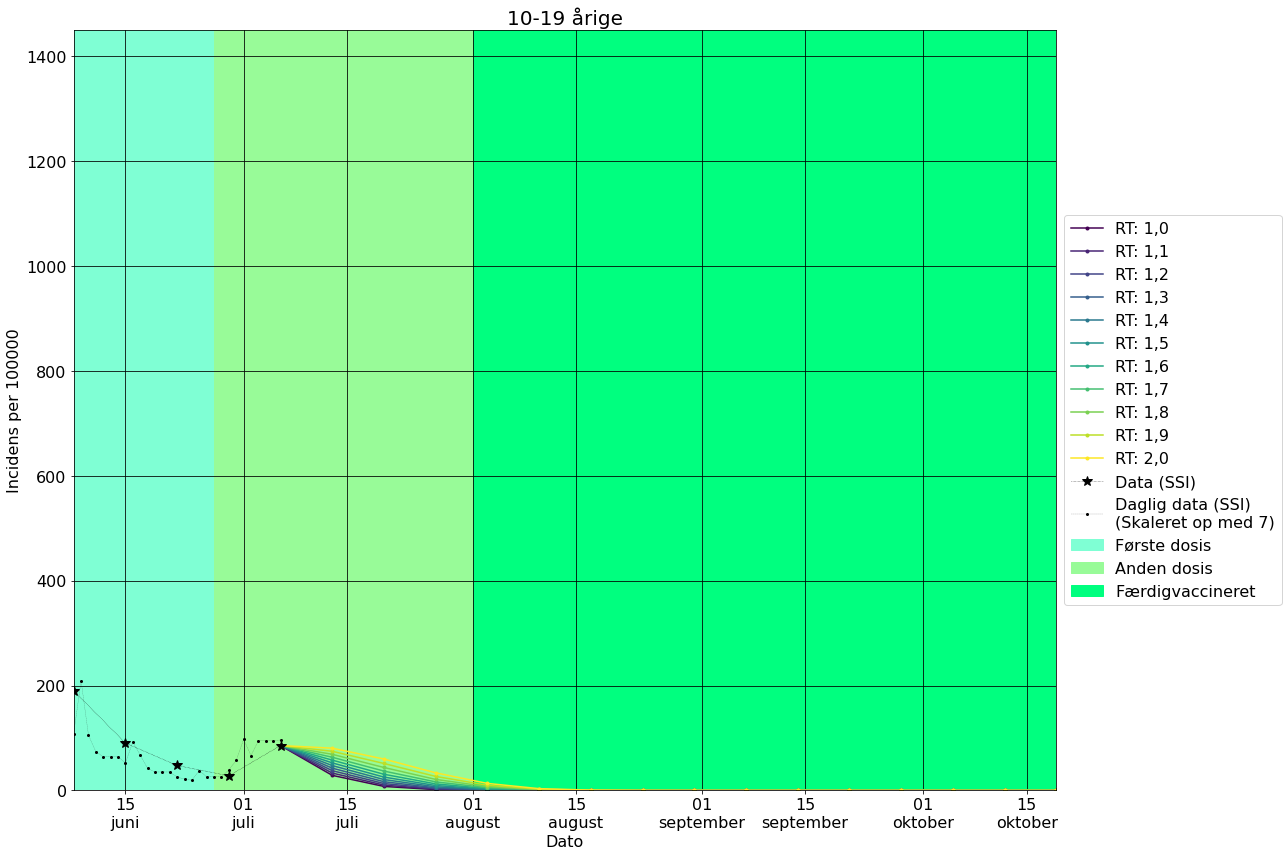

In [10]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

fig,ax1 = plt.subplots(1,1,figsize=(18,12))

# Decide which agegroup to show (see allCols list)
i = 1
curAge = allCols[i]
curPopSize = DK_age[i]
curImmuneRate = immune_rate[i]

# Use latest day with data
tStart = plotDates[-1] + delay_start
#print(t_start)
# Predict tEndWeeks forward
tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
# -delay_start
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

# How much to show in plot
xLims = [tStart-tDelta*4,tSpanPlot[-1]]


# Get data and initial condition
curData = dfCaseDiff[curAge].values
iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]
iniCount = iniRow[curAge].values[0]

# Get vaccination dates from calendar and Plot vaccinations
plot_vacc(ax1, vaccKal[curAge], tSpanPlot[-1])

# Go through a number of RT's
allRTs = np.arange(1.0,2.1,0.1)
# Define a colormap for predictions
cmap = plt.cm.get_cmap(cmap_name,len(allRTs))
cmap_prop = plt.cm.get_cmap('cividis',len(allRTs))
for k in range(0,len(allRTs)):
    
    curRT = allRTs[k]
    curLabel = f'RT: {curRT:.1f}'.replace('.',',')
    # ax1.plot(tSpanPlot,100000 * modelCount/curPopSize,'.-',#label=curLabel,
    #          linewidth=1.5,markersize=6,color=cmap(k), alpha=0.0)
    
    modelCount2 = predicted_cases(tSpanPlot, vaccKal['10-19'], curRT, 
                                  S0=curPopSize*(1-curImmuneRate), init_count=iniCount)
    ax1.plot(tSpanPlot,100000 * modelCount2/curPopSize,'.-',label=curLabel,
             linewidth=1.5,markersize=6,color=cmap(k))
    
    modelCount2_cumul = modelCount2.cumsum()
    pct_list = list(range(0,11,1))
    for i in pct_list:
        for j, c in enumerate(modelCount2_cumul[:-1]/curPopSize):
            if c <= i/100 < modelCount2_cumul[j+1]/curPopSize:
                pct_str = f"{100*modelCount2_cumul[j+1]/curPopSize:.1f}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)
                
# Plot data
ax1.plot(plotDates,100000 * curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
# Also plot daily data, scaled up to weekly numbers
curDataDaily = dfCaseDiffDaily[curAge].values
ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=1450)
# ax1.set_yscale("log")

ax1.set_xlim(xLims)
# Readable dates on x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax1.set_ylabel('Incidens per 100000')
ax1.set_xlabel('Dato')

ax1.grid(color='black')

ax1.set_title(curAge+' årige')
if (curAge == 'I alt'):
    ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

10-19 273589
20-29 778740
30-39 696679
40-49 748824
50-59 801166
60-69 667583
70-79 574697
80-89 236648
90+ 45458


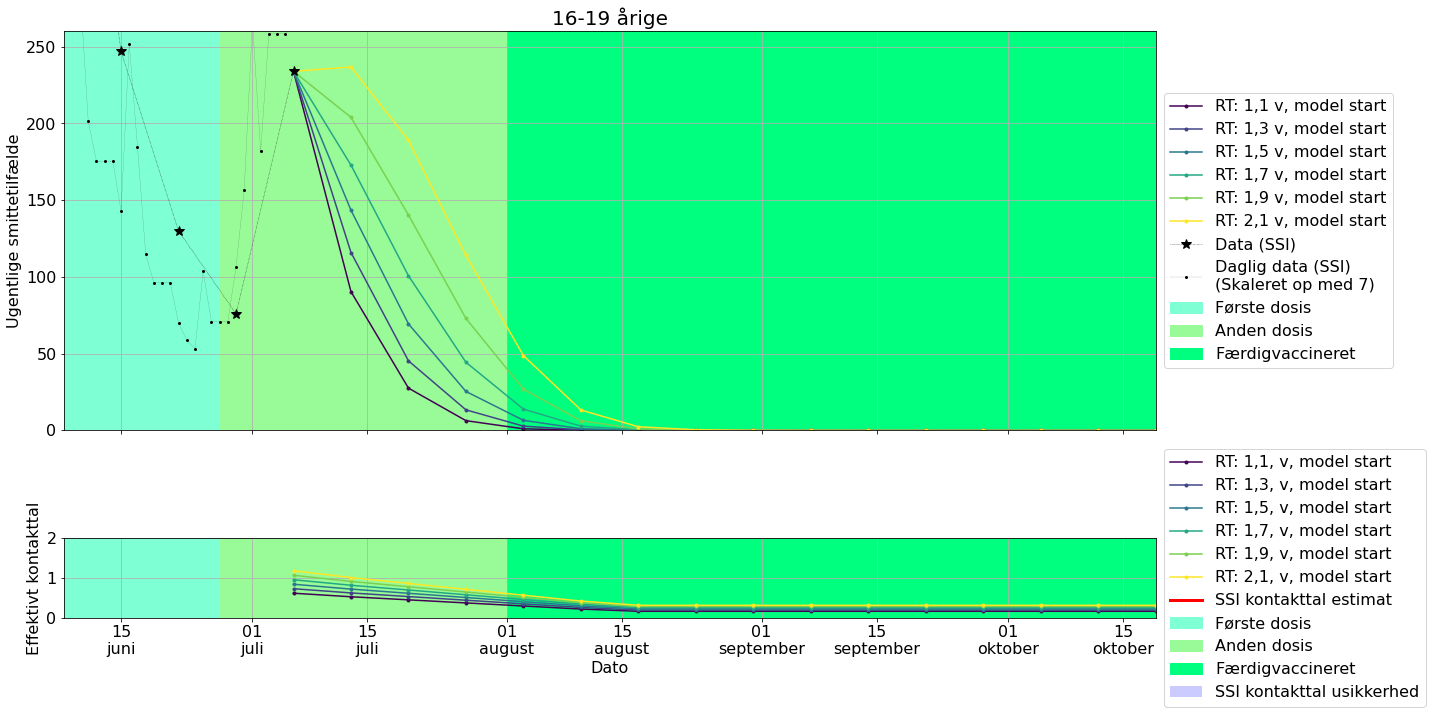

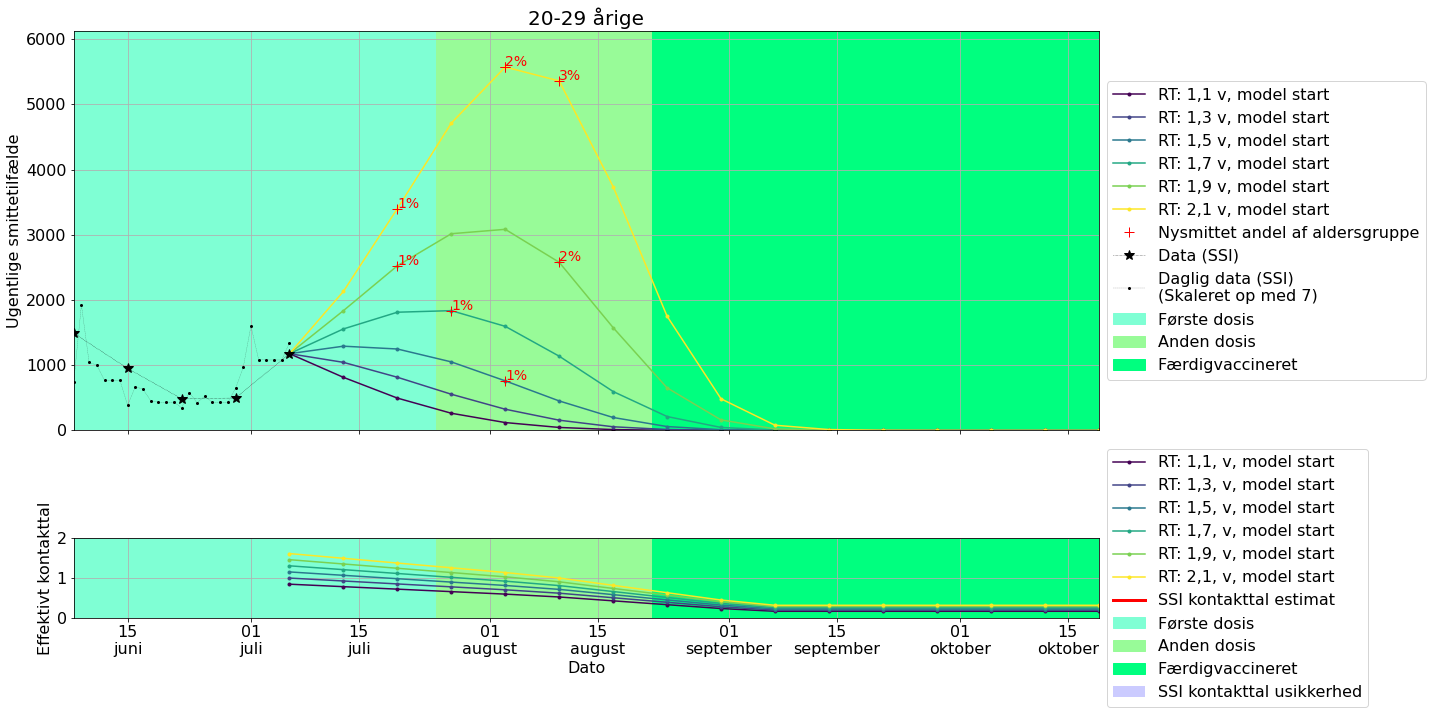

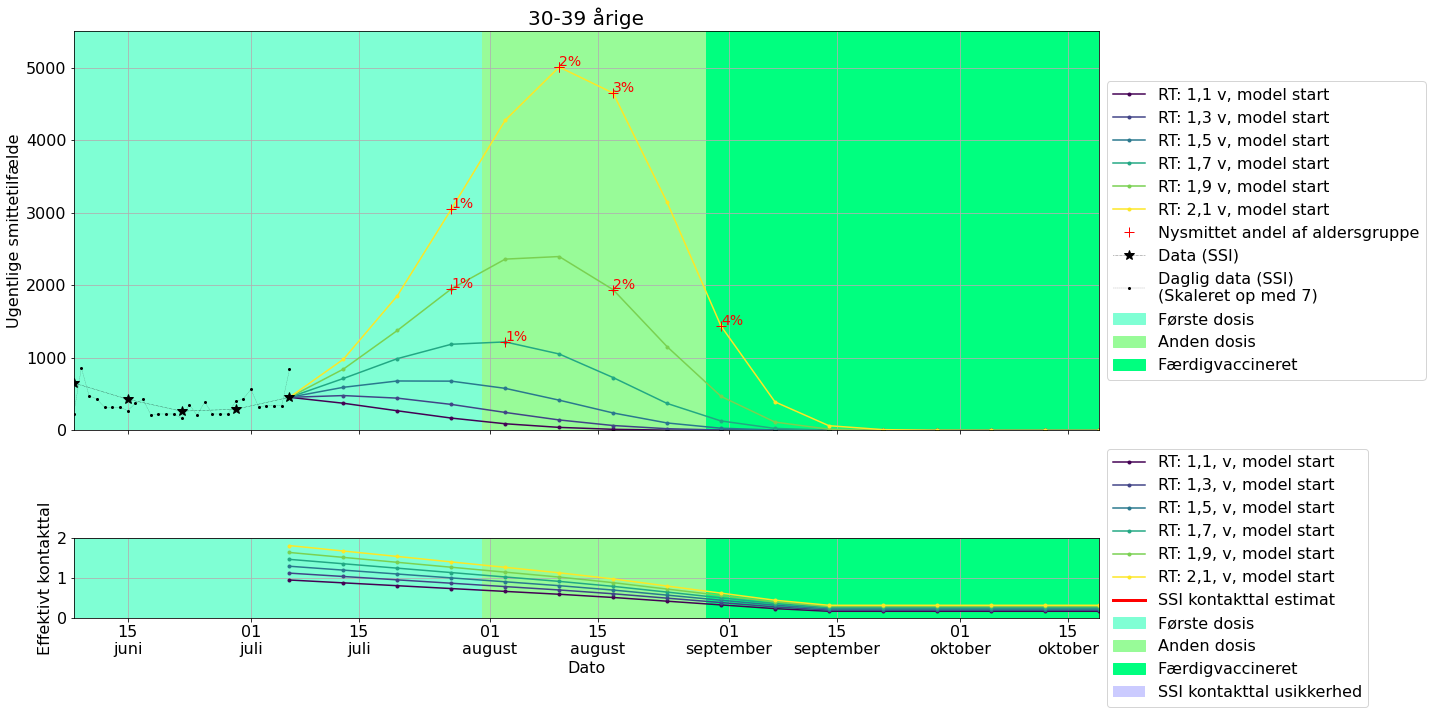

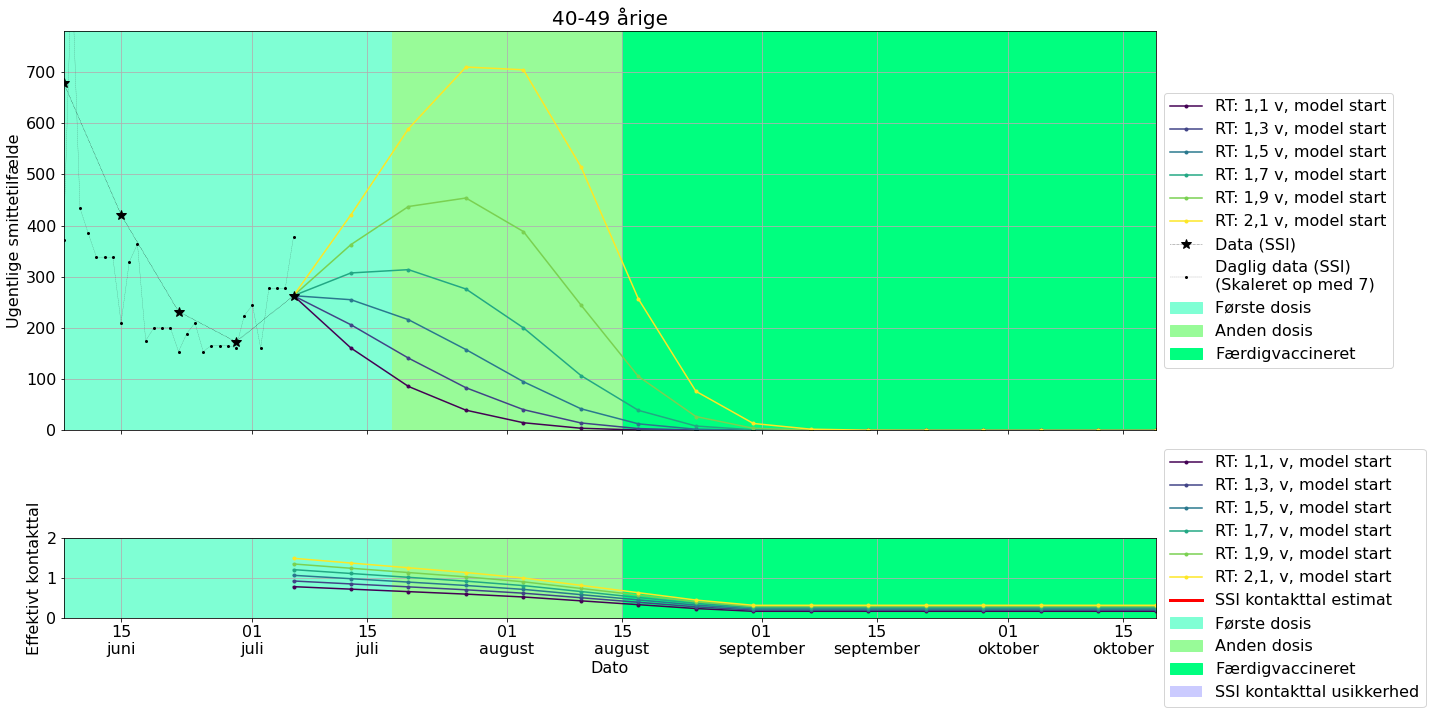

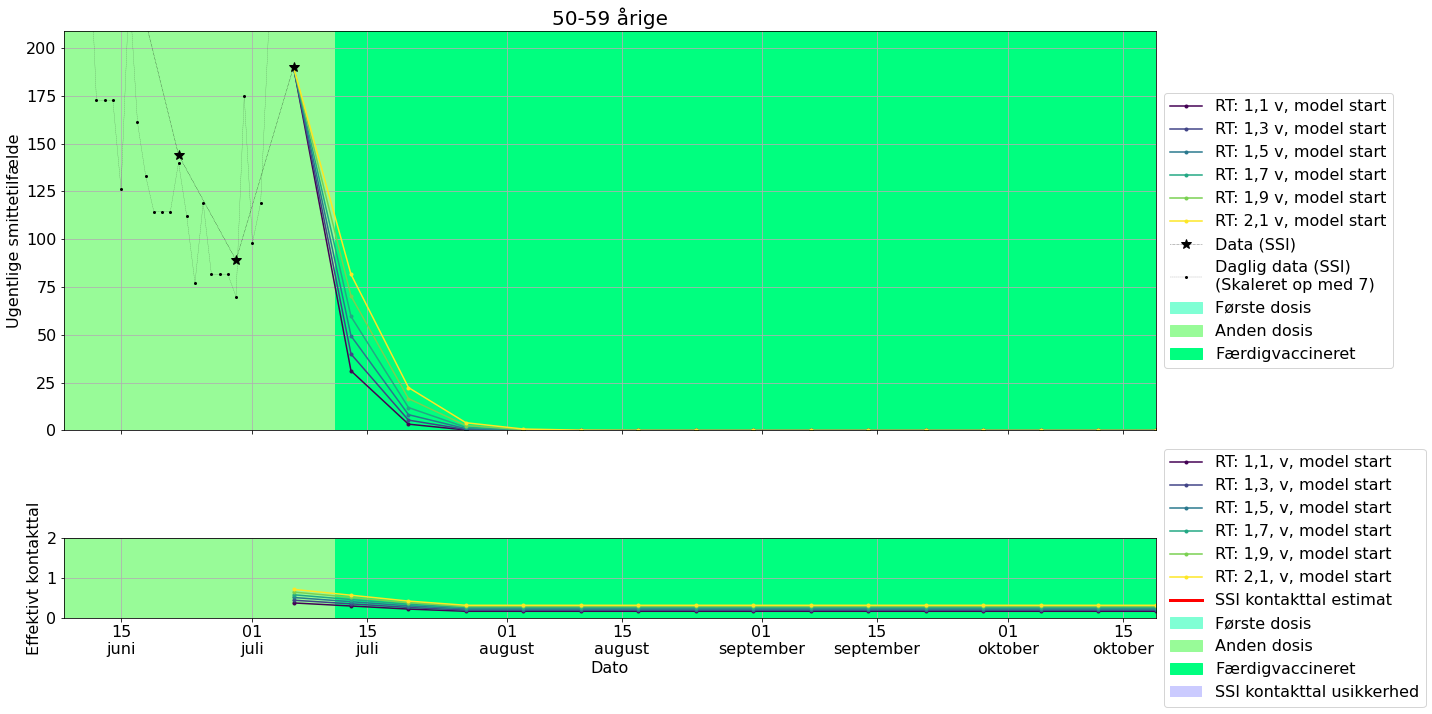

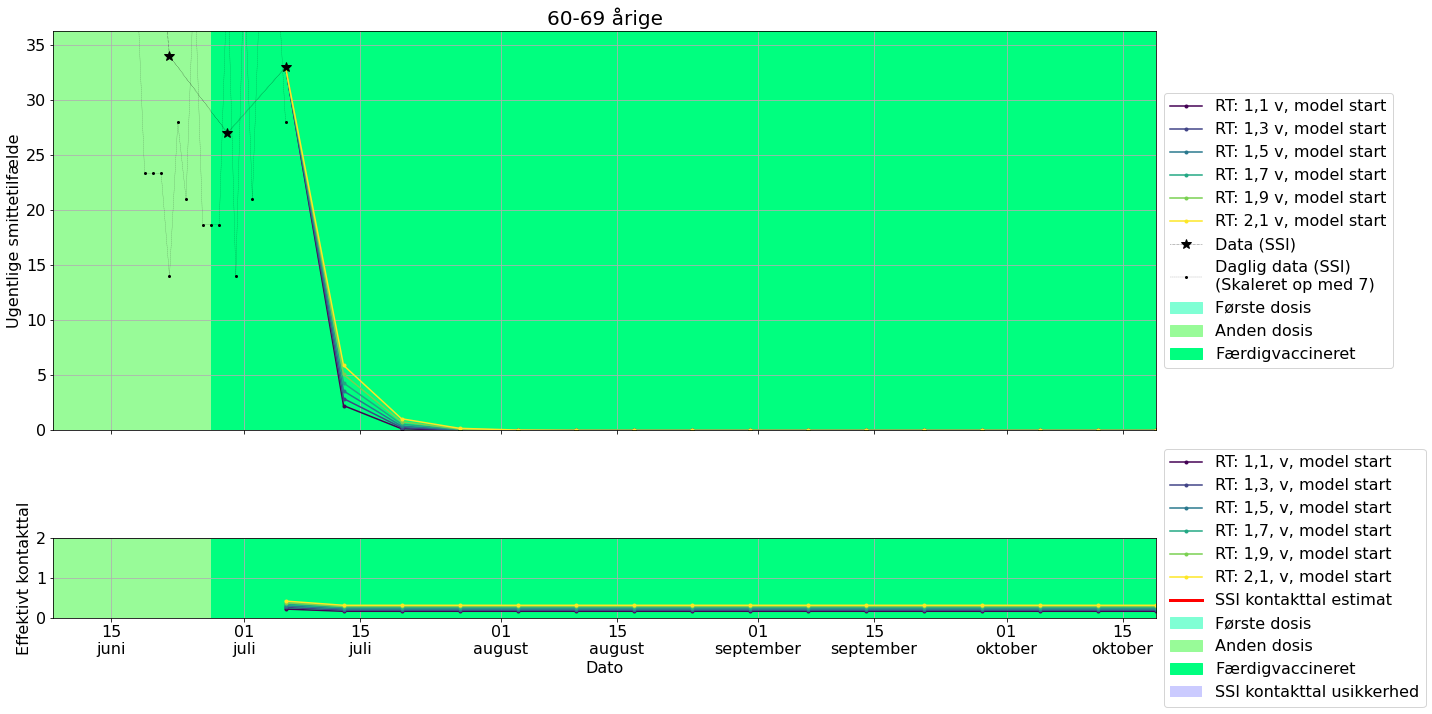

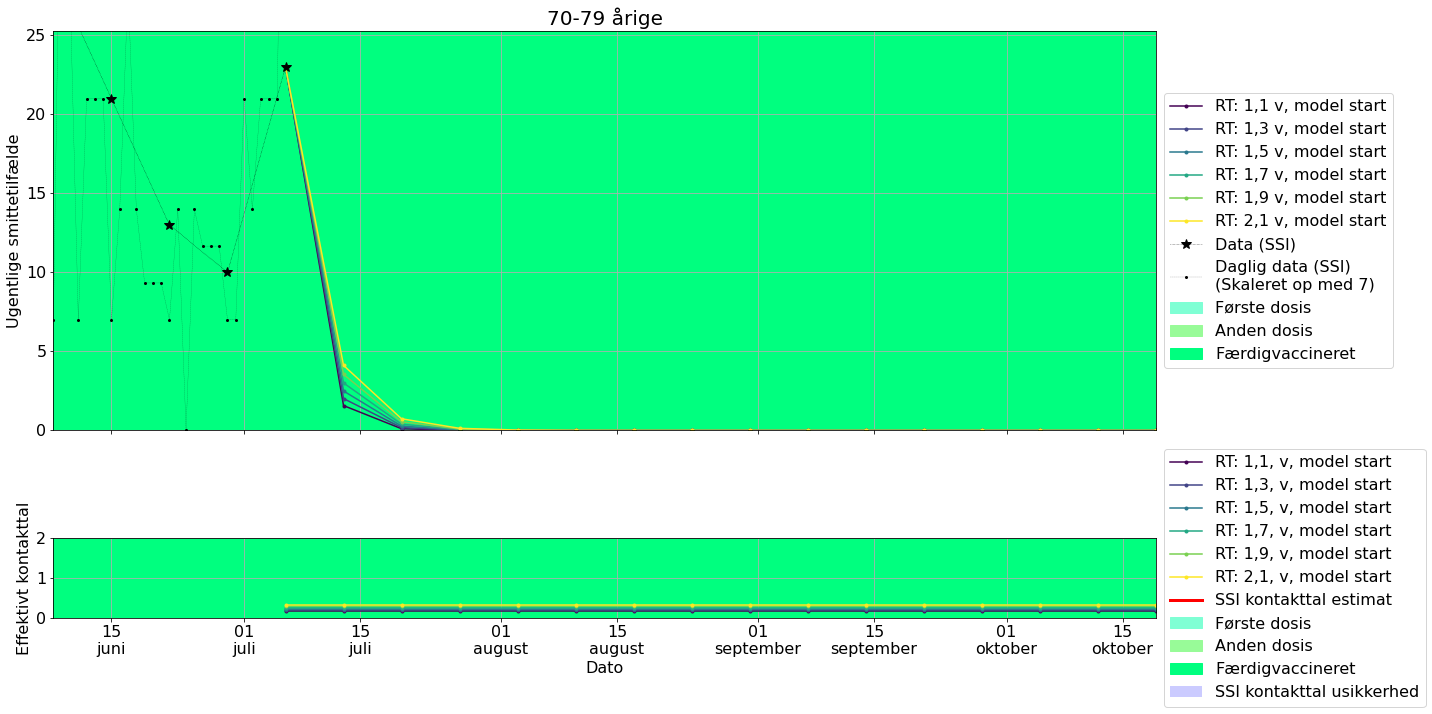

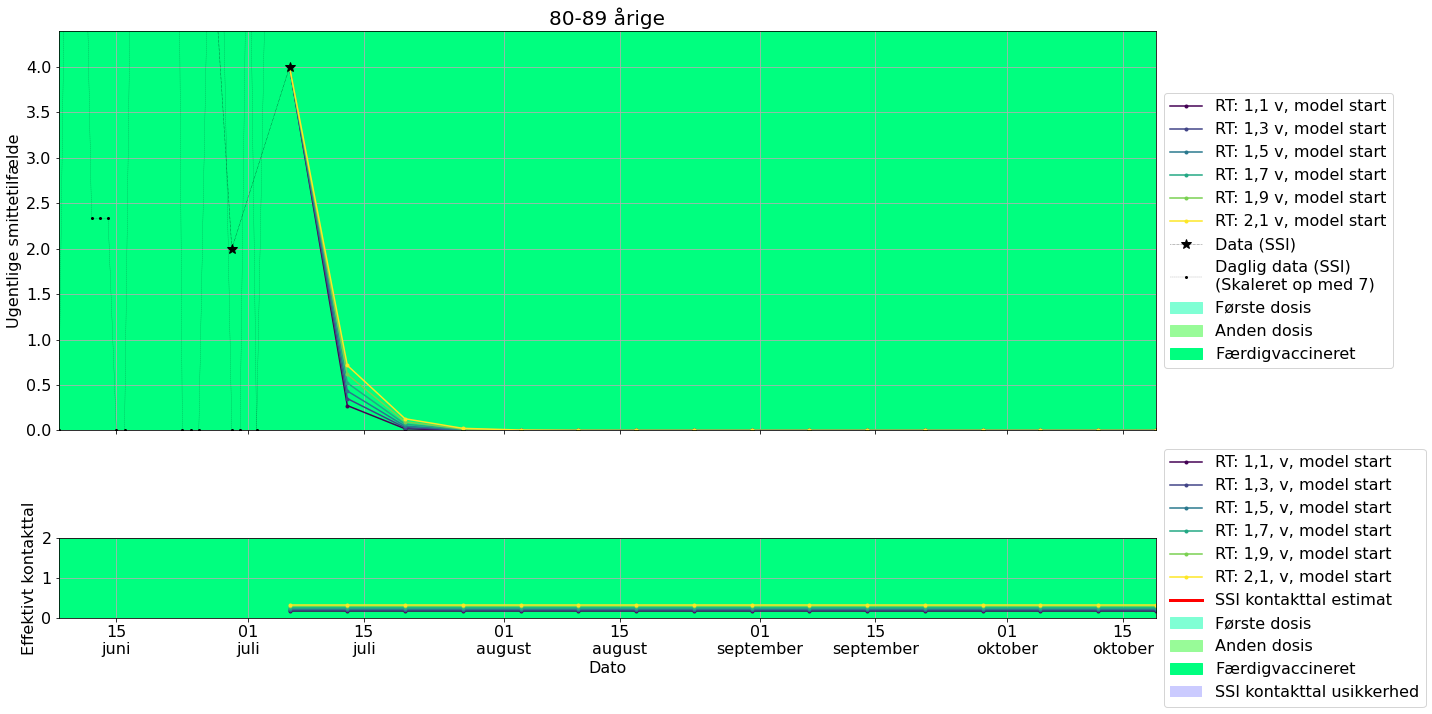

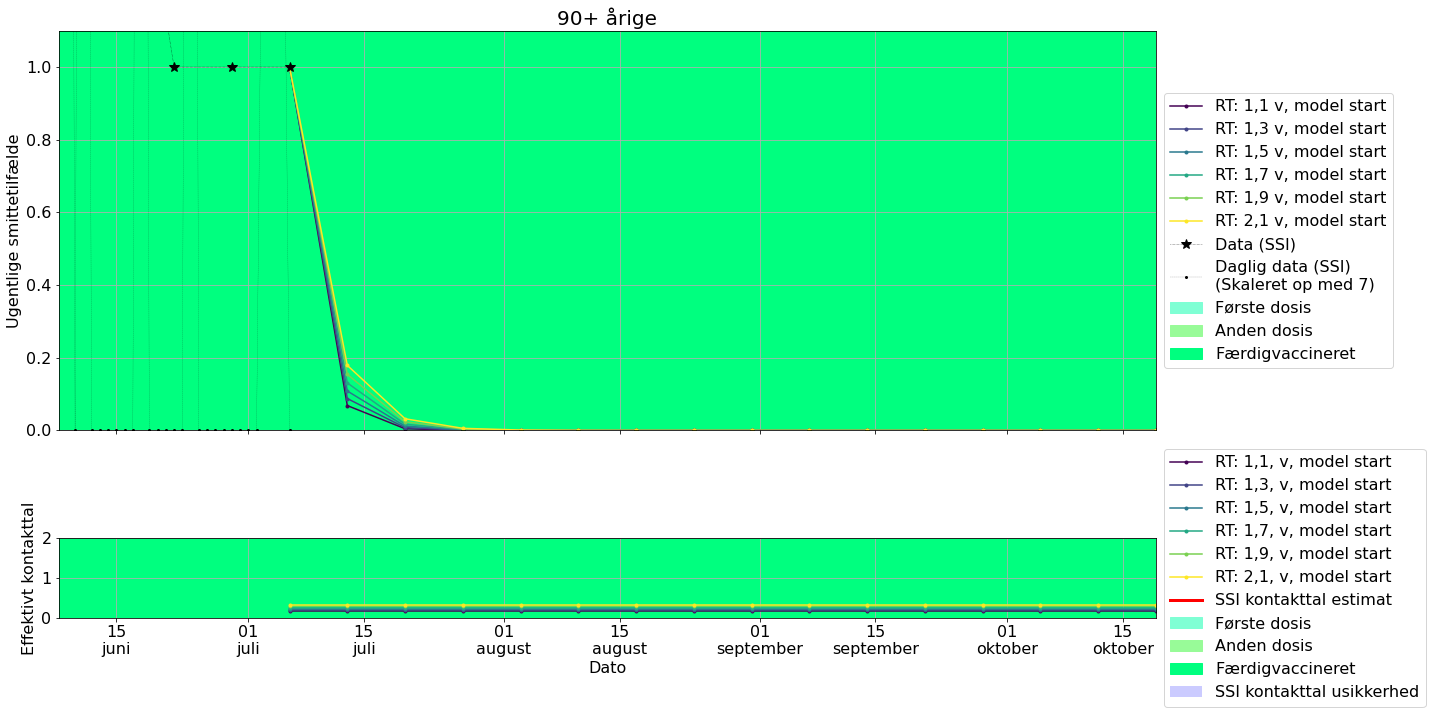

In [11]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

showMax = False

# tStart = np.datetime64('2021-04-27')
tStart = plotDates[-1] + delay_start

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

curCols = dfCaseDiff.columns

allRTs = np.arange(1.1,2.2,0.2)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))


for i, col in enumerate(curCols[1:-1], 1):

    curAge = curCols[i]
    curPopSize = DK_age[i]
    curImmuneRate = immune_rate[i]
    print(curAge, curPopSize)

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]

    curMax = 1200

    #fig2,ax2 = plt.subplots(1,1,figsize=(20,10))
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,10), sharex=True, gridspec_kw={"height_ratios":[5,1]})
    
    plot_vacc(ax1, vaccKal[curAge], tSpanPlot[-1])
    plot_vacc(ax2, vaccKal[curAge], tSpanPlot[-1])

    # for curRT in allRTs:
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize*(1-curImmuneRate), init_count=iniCount)
        # ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize, '.-', 
        ax1.plot(tSpanPlot, modelCount2, '.-', 
                 label=f'RT: {curRT:.1f} v. model start'.replace('.',','),
                 linewidth=1.5, markersize=6, color=cmap(k))
        
        ax2.plot(tSpanPlot, contact_number(tSpanPlot, vaccKal[curAge], curRT), '.-', 
                 label=f'RT: {curRT:.1f}, v. model start'.replace('.',','), 
                 linewidth=1.5, markersize=6, color=cmap(k))

        #curMax = max(100000*modelCount2/curPopSize)*1.1
        curMax = max(modelCount2)*1.1
        modelCount2_cumul = modelCount2.cumsum()
        rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

        pct_list = list(range(0,101,1))
        for i in pct_list:
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]
            for j, c in enumerate(rmc[:-1]/curPopSize):
                filt = (round(100*c) <= i < round(100*rmc[j+1]/curPopSize))
                #if (filt and 100000*modelCount2[j+1]/curPopSize < curMax):
                if (filt and modelCount2[j+1] < curMax):
                    pct_str = f"{round(100*rmc[j+1]/curPopSize)}%"
                    #ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                    #ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)
                    ax1.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                    ax1.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)
                    if i==1 and curRT==max(allRTs):
                        # ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, 
                        ax1.plot(tSpanPlot[j+1], modelCount2[j+1], 
                                 "+r", label="Nysmittet andel af aldersgruppe")


    ax2.fill_between(df_RT["SampleDate"], df_RT["uncertainty_lower"], df_RT["uncertainty_upper"], 
                     label="SSI kontakttal usikkerhed", facecolor="blue", alpha=0.2)
    ax2.plot(df_RT["SampleDate"], df_RT["estimate"], label="SSI kontakttal estimat", 
             color="red", linestyle="-")                    
    
    # ax1.plot(plotDates, 100000*curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
    ax1.plot(plotDates, curData,'k*:',linewidth=0.5,label=f'Data (SSI)')
    
    # ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',
    ax1.plot(plotDatesDaily,(curDataDaily*7),'k.:',
             linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')

    ax1.set_ylim(bottom=0, top=curMax)
    ax2.set_ylim(bottom=0, top=2)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
    ax1.set_xlim(xLims)

    ax1.set_ylabel('Ugentlige smittetilfælde') #('Ugentlig incidens per 100.000 borgere')
    ax2.set_ylabel('Effektivt kontakttal')
    ax2.set_xlabel('Dato')

    ax1.grid()
    ax2.grid()
    
    ax1.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    
    ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
    
    ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

    plt.tight_layout()

    if saveFigures:
        plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)

    

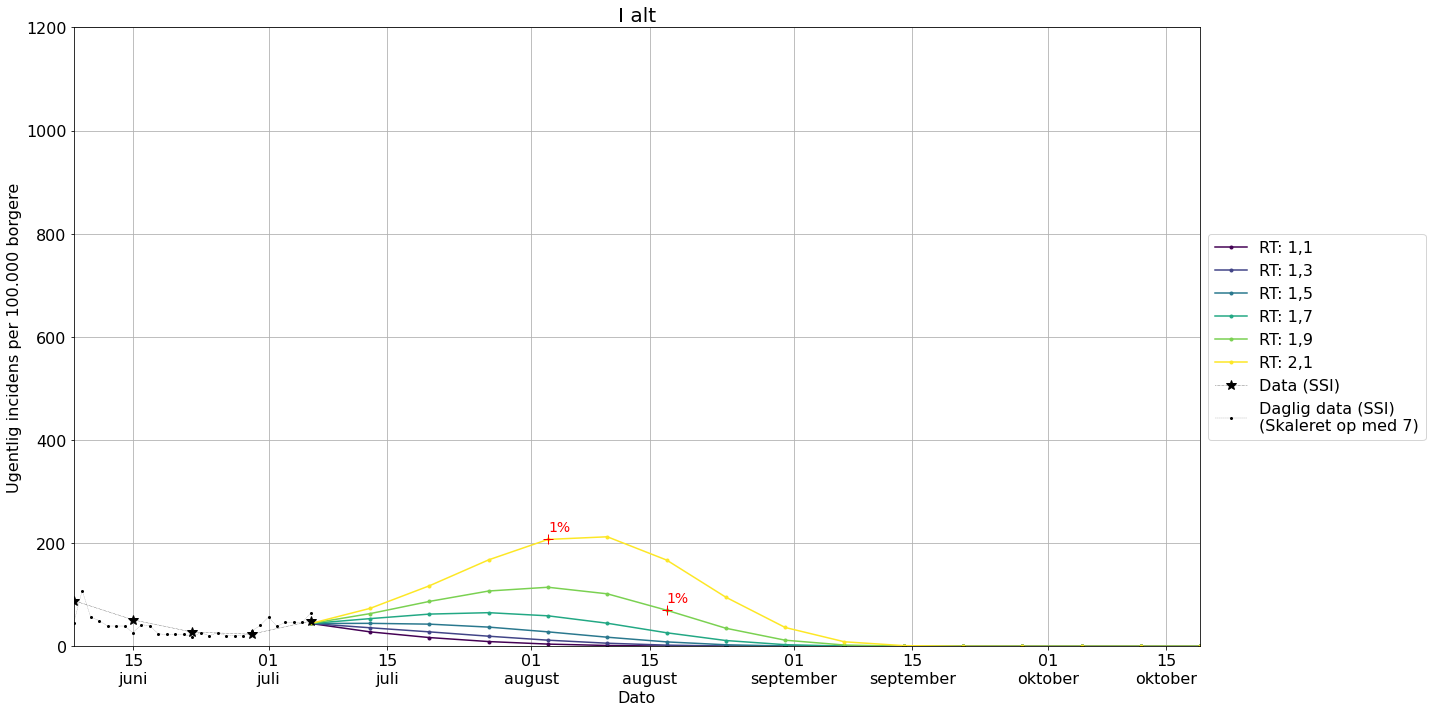

In [12]:
# Here comes the "I alt" plot

allRTs = np.arange(1.1,2.2,0.2)

tStart = plotDates[-1]+delay_start
# print(tStart)

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart, tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

curCols = dfCaseDiff.columns

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

curMax = 1200


weights = [l/DK_age[-1] for l in DK_age[:-1]]
modArray = []
modCN = []

for i in range(0,len(curCols[:-1])):
    curAge = curCols[i]
    curPopSize = DK_age[i]
    curImmuneRate = immune_rate[i]

    # vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]

    # for curRT in allRTs:
    RTArray = []
    CNArray = []
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize*(1-curImmuneRate), init_count=iniCount)
        CN = contact_number(tSpanPlot, vaccKal[curAge], curRT)
        
        RTArray.append(modelCount2)
        CNArray.append(modelCount2)

    modArray.append(RTArray)
    modCN.append(CNArray)


RTmodels_avg = []
CNmodels_avg = []
for i in range(0,len(allRTs)):
    avg_tmp = [len(curCols[1:-1])*sum([weights[j]*modArray[j][i][k] for j, col in enumerate(curCols[1:-1],1)])
               for k in range(len(tSpanPlot))]
    RTmodels_avg.append(avg_tmp)


i = 10
curAge = curCols[i]
curPopSize = DK_age[i]

curData = dfCaseDiff[curAge].values
curDataDaily = dfCaseDiffDaily[curAge].values
iniCount = iniRow[curAge].values[0]

RTmodels_avg = np.array(RTmodels_avg)

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

fig,ax1 = plt.subplots(1,1,figsize=(20,10))

for k in range(0,len(allRTs)):
    
    modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
    
    ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
             linewidth=1.5,markersize=6,color=cmap(k))
    
    modelCount2_cumul = modelCount2.cumsum()
    rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

    pct_list = list(range(0,101,1))
    for i in pct_list:
        for j, c in enumerate(rmc[:-1]/curPopSize):
            filt = (round(100*c) <= i < round(100*rmc[j+1]/curPopSize))
            if filt and 100000*modelCount2[j+1]/curPopSize < curMax:
                pct_str = f"{round(100*rmc[j+1]/curPopSize)}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)

ax1.plot(plotDates, 100000*curData/curPopSize, 'k*:', linewidth=0.5,label=f'Data (SSI)')

ax1.plot(plotDatesDaily, 100000*(curDataDaily*7)/curPopSize, 'k.:',
         linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=curMax)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.set_xlim(xLims)

ax1.set_ylabel('Ugentlig incidens per 100.000 borgere')
ax1.set_xlabel('Dato')

ax1.grid()

ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)
        

# Tables

In [13]:
# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)

# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
# fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

#tStart = np.datetime64('2021-05-18')
tStart = plotDates[-1] +delay_start
print(tStart)

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

modArray = []
for i, age in enumerate(allAges, 0):
    #curCHR = case_hosp_rate[1:][i]
    #curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]

    # vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    # curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    # if (curAge == 'I alt'):
    #     curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]
            for v1 in np.arange(vacc1_min, vacc2_min, 0.05):
                modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                              S0=curPopSize*(1-curImmuneRate), init_count=iniCount, 
                                              x1=v1)

                modelMax = max(modelCount2)
                top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                # curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                #            linewidth=1.5, markersize=6, color=cmap(k))

                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                for n in range(len(tSpanPlot)):
                    new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                               'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                               'Count':modelCount2[n], 'CountCumul':rmc[n]}
                    model_df = model_df.append(new_row, ignore_index=True)

                RTArray.append(modelCount2)

                # pct_list = list(range(1,101,1))
                # for l in pct_list:
                #     for j, c in enumerate(rmc[:-1]/curPopSize):
                #         filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                #         if filt and (modelCount2[j+1] < top):
                #             pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                #             curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                #             curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

            modArray.append(RTArray)


    # urAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    # curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
    #            linewidth=0.25, markersize=4)

    # curAx.set_ylim(bottom=0, top=top)

    # curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    # curAx.set_xlim(xLims)

    # curAx.set_ylabel('Ugentlige smittetilfælde')
    # curAx.set_xlabel('Dato')

    # curAx.grid(color='black')
    # curAx.grid(axis='y')

    # curAx.legend()
    # curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

# if saveFigures:
#     plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df.to_csv('model_results_spread_prediction_var_vacc.csv')
model_df.loc[model_df["Age"]=="30-39"]

2021-07-06 00:00:00


,Age,CaseHospRate,Population,Start,End,RT,Count,CountCumul,vacc1,PctCumul,HospCumul
3168,30-39,0.0618,696679,2021-07-06,2021-07-06,0.9,4.560000e+02,0.000000,0.40,0,0.000000
3169,30-39,0.0618,696679,2021-07-06,2021-07-13,0.9,2.990572e+02,299.057202,0.40,0.000429261,18.481735
3170,30-39,0.0618,696679,2021-07-06,2021-07-20,0.9,1.780469e+02,477.104053,0.40,0.000684826,29.485030
3171,30-39,0.0618,696679,2021-07-06,2021-07-27,0.9,9.565326e+01,572.757316,0.40,0.000822125,35.396402
3172,30-39,0.0618,696679,2021-07-06,2021-08-03,0.9,4.604477e+01,618.802086,0.40,0.000888217,38.241969
3173,30-39,0.0618,696679,2021-07-06,2021-08-10,0.9,1.969415e+01,638.496237,0.40,0.000916486,39.459067
3174,30-39,0.0618,696679,2021-07-06,2021-08-17,0.9,6.950442e+00,645.446679,0.40,0.000926462,39.888605
3175,30-39,0.0618,696679,2021-07-06,2021-08-24,0.9,1.771500e+00,647.218179,0.40,0.000929005,39.998083
3176,30-39,0.0618,696679,2021-07-06,2021-08-31,0.9,2.975608e-01,647.515740,0.40,0.000929432,40.016473
3177,30-39,0.0618,696679,2021-07-06,2021-09-07,0.9,2.795243e-02,647.543692,0.40,0.000929472,40.018200


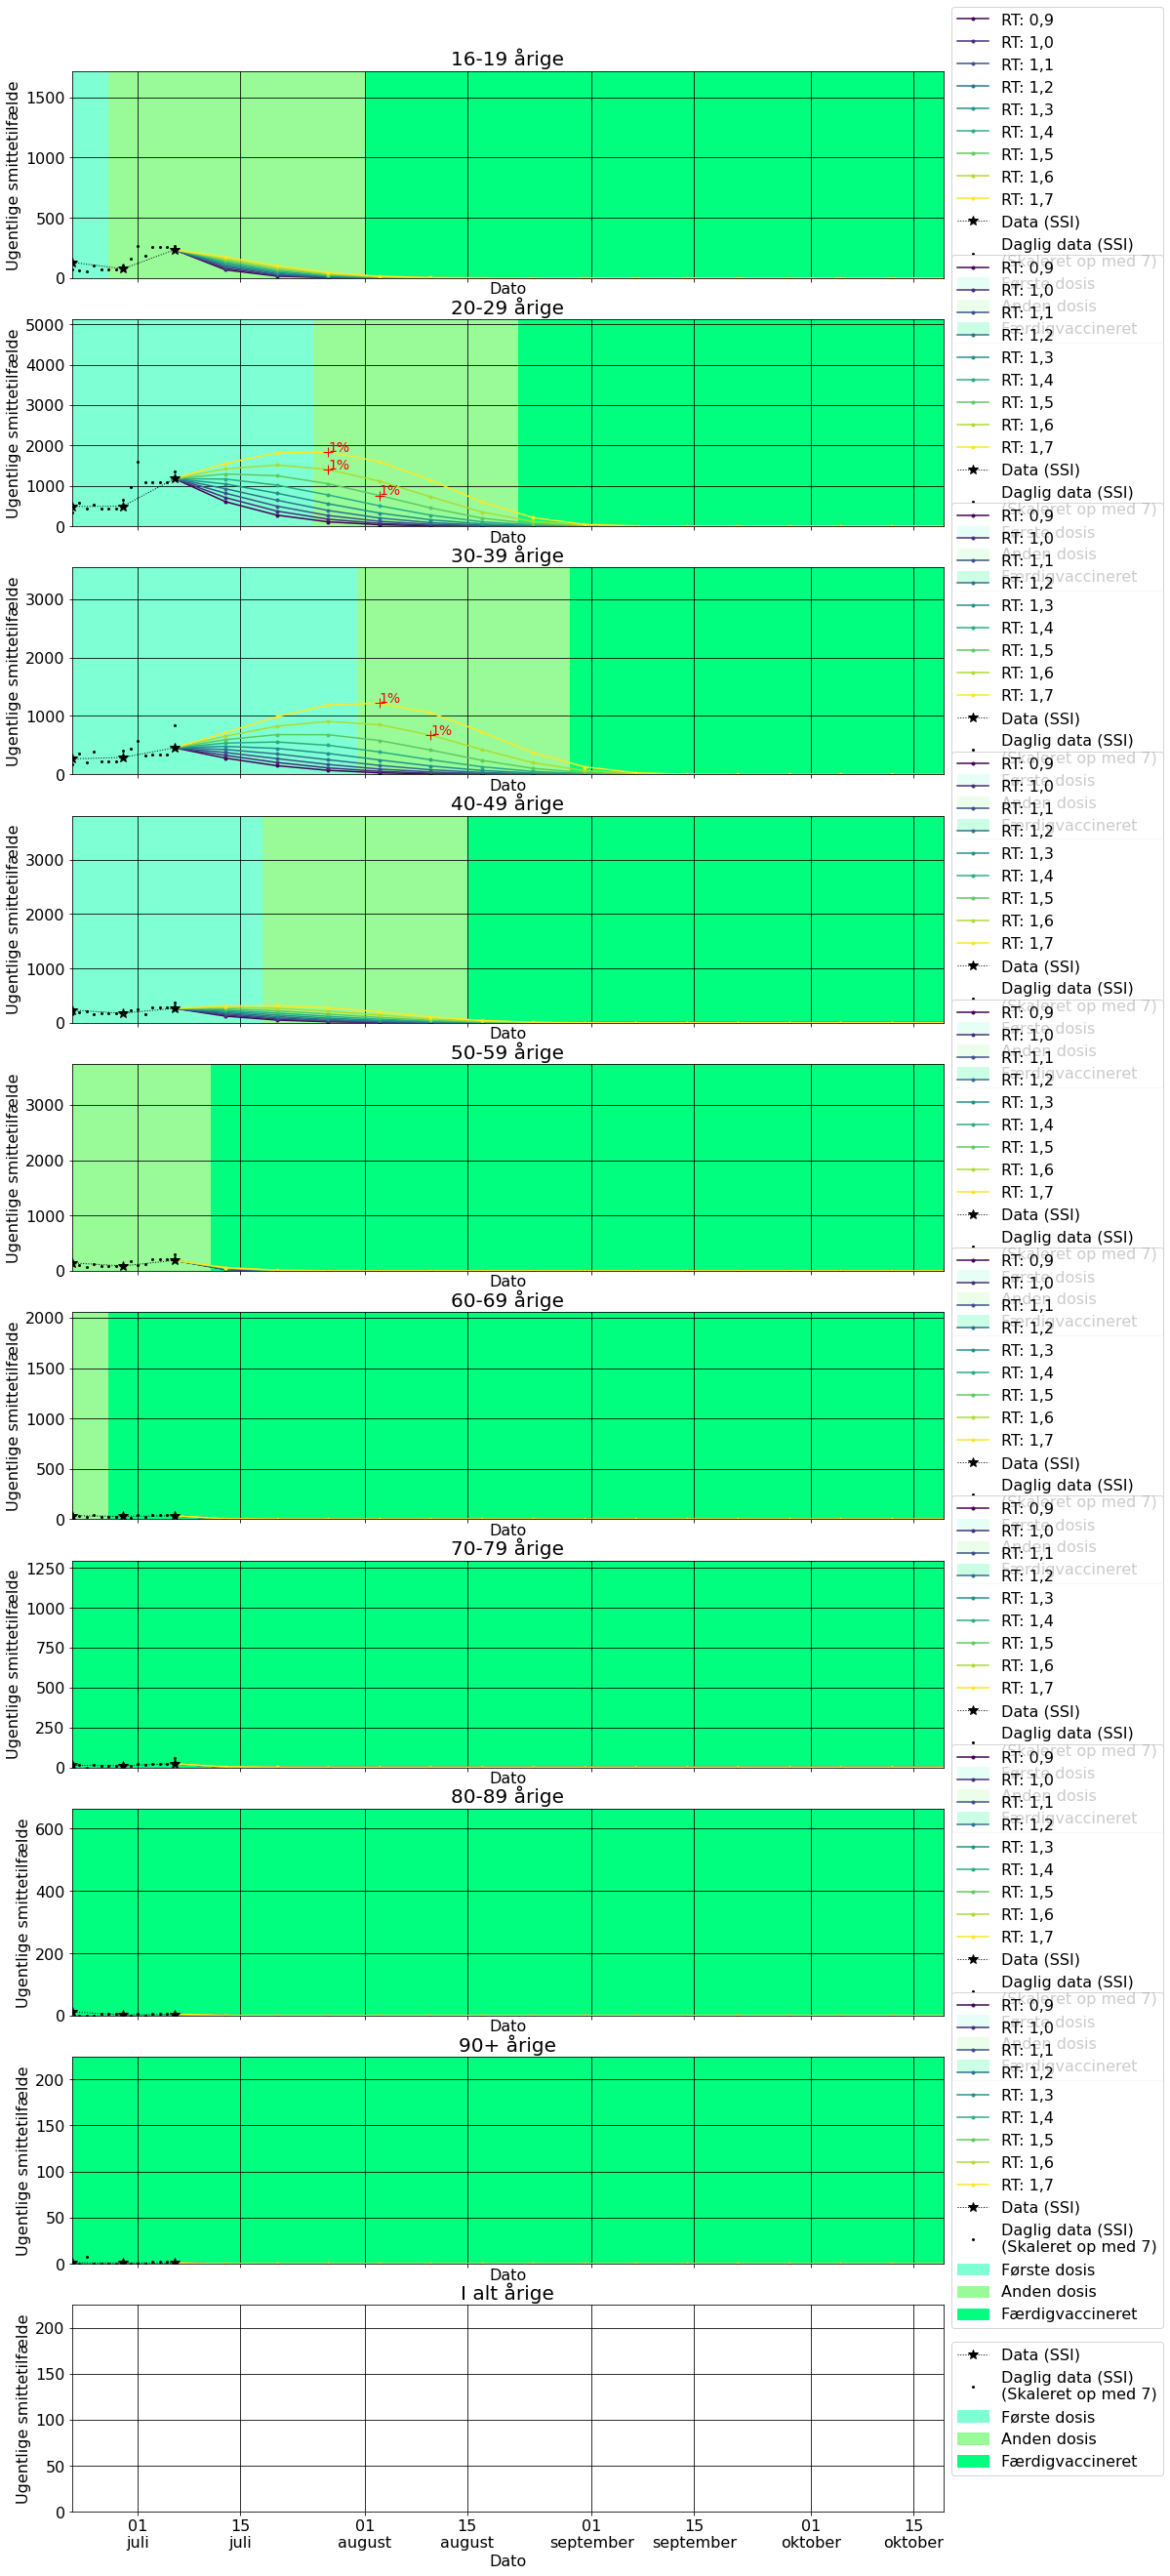

In [14]:
# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)

# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

#allRTs = np.arange(0.9,1.8,0.1)
allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

#tStart = np.datetime64('2021-05-18')
tStart = plotDates[-1]+delay_start

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

modArray = []
for i, age in enumerate(allAges, 0):
    #curCHR = case_hosp_rate[1:][i]
    curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]


    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    plot_vacc(curAx, vaccKal[curAge], tSpanPlot[-1])
    
    # vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]
    #curAx.axvspan(vaccOneIni,vaccOneFin,color='aquamarine',label='Vaccination start')
    ##curAx.axvspan(vaccOneFin,vaccTwoIni,color='yellow',label='Første dosis færdig')
    #curAx.axvspan(vaccTwoIni,vaccTwoFin,color='palegreen',label='Anden dosis start')
    #curAx.axvspan(vaccTwoFin,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')
    
    curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    #if (curAge == 'I alt'):
    #    curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]
            modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                          S0=curPopSize*(1-curImmuneRate), init_count=iniCount)

            modelMax = max(modelCount2)
            top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

            curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                       linewidth=1.5, markersize=6, color=cmap(k))

            modelCount2_cumul = modelCount2.cumsum()
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

            for n in range(len(tSpanPlot)):
                new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                           'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                           'Count':modelCount2[n], 'CountCumul':rmc[n]}
                model_df = model_df.append(new_row, ignore_index=True)

            RTArray.append(modelCount2)

            pct_list = list(range(0,101,1))
            for l in pct_list:
                for j, c in enumerate(rmc[:-1]/curPopSize):
                    filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                    if filt and (modelCount2[j+1] < top):
                        pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                        curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                        curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

        modArray.append(RTArray)


    curAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
               linewidth=0.25, markersize=4)

    curAx.set_ylim(bottom=0, top=top)

    curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    curAx.set_xlim(xLims)

    curAx.set_ylabel('Ugentlige smittetilfælde')
    curAx.set_xlabel('Dato')

    curAx.grid(color='black')
    # curAx.grid(axis='y')

    curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df.to_csv('model_results_spread_prediction.csv')
#model_df.loc[model_df["Age"]=="20-29"]

In [15]:
filt = (model_df["End"].isin(["2021-06-29", "2021-08-03", "2021-08-31"]))

table_cases = model_df.loc[filt, ["End", "Age", "RT", "CountCumul"]]
table_cases = pd.DataFrame(table_cases.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))

table_cases

## styg kommaerne.

CountCumul                                                      \
End     2021-08-03   2021-08-31   2021-08-03   2021-08-31   2021-08-03   
RT             0.9          0.9          1.0          1.0          1.1   
Age                                                                      
10-19    85.099796    85.125469   103.909215   103.965967   125.333041   
20-29  1020.313922  1032.979027  1319.767415  1348.528515  1693.328281   
30-39   523.463819   535.952398   691.344469   720.132375   906.284723   
40-49   187.079314   188.169395   238.385355   240.833362   301.057312   
50-59    24.996168    24.996414    29.642514    29.643057    34.656077   
60-69     1.761343     1.761355     2.079442     2.079468     2.419831   
70-79     1.227604     1.227612     1.449310     1.449328     1.686552   
80-89     0.213497     0.213498     0.252055     0.252058     0.293314   
90+       0.053374     0.053375     0.063014     0.063014     0.073329   

                                                                        \
End     2021-08-31   2021-08-03   2021-08-31   2021-08-03   2021-08-31   
RT             1.1          1.2          1.2          1.3          1.3   
Age                                                                      
10-19   125.449507   149.713691   149.938490   177.445555   177.857705   
20-29  1754.039521  2159.121960  2279.788949  2739.079986  2967.103767   
30-39   968.042984  1180.917681  1305.811541  1530.676861  1771.081064   
40-49   306.164874   377.631675   387.661606   471.154869   489.876361   
50-59    34.657192    40.048796    40.050950    45.835009    45.838960   
60-69     2.419884     2.782838     2.782940     3.168933     3.169120   
70-79     1.686589     1.939557     1.939628     2.208655     2.208785   
80-89     0.293321     0.337316     0.337328     0.384116     0.384138   
90+       0.073330     0.084329     0.084332     0.096029     0.096034   

                                                                        \
End     2021-08-03   2021-08-31   2021-08-03   2021-08-31   2021-08-03   
RT             1.4          1.4          1.5          1.5          1.6   
Age                                                                      
10-19   208.979797   209.703104   244.829648   246.052140   285.576137   
20-29  3459.468023  3872.220409  4351.446208  5071.313276  5451.658946   
30-39  1974.207611  2417.932144  2533.806687  3323.671619  3235.888736   
40-49   585.253287   618.723525   724.208562   781.868910   893.037948   
50-59    52.031315    52.038253    58.656506    58.668241    65.731544   
60-69     3.578718     3.579045     4.012918     4.013472     4.472377   
70-79     2.494264     2.494492     2.796889     2.797276     3.117121   
80-89     0.433787     0.433827     0.486418     0.486486     0.542111   
90+       0.108447     0.108457     0.121604     0.121621     0.135528   

                                              
End     2021-08-31   2021-08-03   2021-08-31  
RT             1.6          1.7          1.7  
Age                                           
10-19   287.575801   331.874210   335.052553  
20-29  6666.917109  6802.851137  8795.923321  
30-39  4598.005104  4111.478352  6395.114112  
40-49   989.222524  1097.579691  1253.557354  
50-59    65.750754    73.279572    73.310129  
60-69     4.473285     4.958058     4.959502  
70-79     3.117753     3.455627     3.456634  
80-89     0.542222     0.600983     0.601158  
90+       0.135555     0.150245     0.150289

In [16]:
print(model_df["End"].unique())
filt = (model_df["End"].isin(["2021-06-29", "2021-07-13", "2021-07-20", "2021-08-03", "2021-08-31"]))
#filt = (model_df["End"].isin(["2021-06-01", "2021-06-29"]))

table_hosp = model_df.loc[filt, ["End", "Age", "RT", "HospCumul"]]
table_hosp = pd.DataFrame(table_hosp.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))
table_hosp.loc['I alt',:] = table_hosp.sum(axis=0)

table_hosp

['2021-07-06T00:00:00.000000000' '2021-07-13T00:00:00.000000000'
 '2021-07-20T00:00:00.000000000' '2021-07-27T00:00:00.000000000'
 '2021-08-03T00:00:00.000000000' '2021-08-10T00:00:00.000000000'
 '2021-08-17T00:00:00.000000000' '2021-08-24T00:00:00.000000000'
 '2021-08-31T00:00:00.000000000' '2021-09-07T00:00:00.000000000'
 '2021-09-14T00:00:00.000000000' '2021-09-21T00:00:00.000000000'
 '2021-09-28T00:00:00.000000000' '2021-10-05T00:00:00.000000000'
 '2021-10-12T00:00:00.000000000' '2021-10-19T00:00:00.000000000']


HospCumul                                                         \
End   2021-07-13 2021-07-20 2021-08-03 2021-08-31 2021-07-13 2021-07-20   
RT           0.9        0.9        0.9        0.9        1.0        1.0   
Age                                                                       
10-19   0.576524   0.706870   0.731858   0.732079   0.674477   0.852877   
20-29  18.834649  27.342397  31.833794  32.228946  22.034693  33.678996   
30-39  17.158065  26.350329  32.350064  33.121858  20.073253  32.654434   
40-49  11.159495  15.577744  17.510624  17.612655  13.055515  19.102641   
50-59   3.183819   3.431305   3.444472   3.444506   3.724756   4.063482   
60-69   0.290279   0.304986   0.305769   0.305771   0.339598   0.359727   
70-79   0.384120   0.403582   0.404618   0.404621   0.449383   0.476020   
80-89   0.225665   0.237099   0.237707   0.237709   0.264006   0.279655   
90+     0.008442   0.008869   0.008892   0.008892   0.009876   0.010461   
I alt  51.821059  74.363181  86.827799  88.097037  60.625556  91.478295   

                                                      ...              \
End    2021-08-03  2021-08-31 2021-07-13  2021-07-20  ...  2021-08-03   
RT            1.0         1.0        1.1         1.1  ...         1.5   
Age                                                   ...               
10-19    0.893619    0.894107   0.777349    1.014317  ...    2.105535   
20-29   41.176743   42.074090  25.395436   40.862607  ...  135.765122   
30-39   42.725088   44.504181  23.134837   39.846466  ...  156.589253   
40-49   22.312869   22.542003  15.046749   23.079169  ...   67.785921   
50-59    4.084738    4.084813   4.292857    4.742789  ...    8.082866   
60-69    0.360991    0.360996   0.391394    0.418131  ...    0.696642   
70-79    0.477693    0.477698   0.517923    0.553305  ...    0.921855   
80-89    0.280638    0.280641   0.304272    0.325059  ...    0.541578   
90+      0.010498    0.010498   0.011382    0.012160  ...    0.020259   
I alt  112.322878  115.229027  69.872200  110.854004  ...  372.509033   

                                                                               \
End    2021-08-31  2021-07-13  2021-07-20  2021-08-03  2021-08-31  2021-07-13   
RT            1.5         1.6         1.6         1.6         1.6         1.7   
Age                                                                             
10-19    2.116048    1.358237    2.081691    2.455955    2.473152    1.486582   
20-29  158.224974   44.372662   91.593152  170.091759  208.007814   48.565604   
30-39  205.402906   40.422786   91.442544  199.977924  284.156715   44.242489   
40-49   73.182930   26.290721   50.813292   83.588352   92.591228   28.775031   
50-59    8.084484    7.500777    8.874396    9.057807    9.060454    8.209554   
60-69    0.696739    0.683871    0.765499    0.776405    0.776562    0.748492   
70-79    0.921982    0.904952    1.012971    1.027403    1.027612    0.990464   
80-89    0.541653    0.531645    0.595107    0.603587    0.603709    0.581882   
90+      0.020262    0.019888    0.022262    0.022579    0.022583    0.021767   
I alt  449.191978  122.085538  247.200914  467.601770  598.719830  133.621867   

                                           
End    2021-07-20  2021-08-03  2021-08-31  
RT            1.7         1.7         1.7  
Age                                        
10-19    2.353220    2.854118    2.881452  
20-29  105.131819  212.248955  274.432808  
30-39  105.359911  254.089362  395.218052  
40-49   58.151029  102.733459  117.332968  
50-59    9.855036   10.097925   10.102136  
60-69    0.846276    0.860719    0.860970  
70-79    1.119862    1.138975    1.139307  
80-89    0.657905    0.669135    0.669329  
90+      0.024611    0.025031    0.025038  
I alt  283.499667  584.717679  802.662060  

[10 rows x 36 columns]

In [17]:

# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)

delay_start = np.timedelta64(14,'D')

# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
# fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

#tStart = np.datetime64('2021-05-18')
tStart = plotDates[-1] +delay_start
print(tStart)

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

modArray = []
for i, age in enumerate(allAges, 0):
    #curCHR = case_hosp_rate[1:][i]
    #curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]

    # vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    # curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    # if (curAge == 'I alt'):
    #     curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]
            for v1 in np.arange(vacc1_min, vacc2_min, 0.05):
                modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                              S0=curPopSize*(1-curImmuneRate), init_count=iniCount, 
                                              x1=v1)

                modelMax = max(modelCount2)
                top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                # curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                #            linewidth=1.5, markersize=6, color=cmap(k))

                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                for n in range(len(tSpanPlot)):
                    new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                               'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                               'Count':modelCount2[n], 'CountCumul':rmc[n]}
                    model_df = model_df.append(new_row, ignore_index=True)

                RTArray.append(modelCount2)

                # pct_list = list(range(1,101,1))
                # for l in pct_list:
                #     for j, c in enumerate(rmc[:-1]/curPopSize):
                #         filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                #         if filt and (modelCount2[j+1] < top):
                #             pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                #             curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                #             curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

            modArray.append(RTArray)


    # urAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    # curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
    #            linewidth=0.25, markersize=4)

    # curAx.set_ylim(bottom=0, top=top)

    # curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    # curAx.set_xlim(xLims)

    # curAx.set_ylabel('Ugentlige smittetilfælde')
    # curAx.set_xlabel('Dato')

    # curAx.grid(color='black')
    # curAx.grid(axis='y')

    # curAx.legend()
    # curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

# if saveFigures:
#     plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df.to_csv('model_results_spread_prediction_var_vacc_delayed.csv')
model_df.loc[model_df["Age"]=="30-39"]



2021-07-20 00:00:00


,Age,CaseHospRate,Population,Start,End,RT,Count,CountCumul,vacc1,PctCumul,HospCumul
2772,30-39,0.0618,696679,2021-07-20,2021-07-20,0.9,4.560000e+02,0.000000,0.40,0,0.000000
2773,30-39,0.0618,696679,2021-07-20,2021-07-27,0.9,2.455842e+02,245.584239,0.40,0.000352507,15.177106
2774,30-39,0.0618,696679,2021-07-20,2021-08-03,0.9,1.184017e+02,363.985932,0.40,0.000522459,22.494331
2775,30-39,0.0618,696679,2021-07-20,2021-08-10,0.9,5.069666e+01,414.682587,0.40,0.000595228,25.627384
2776,30-39,0.0618,696679,2021-07-20,2021-08-17,0.9,1.790673e+01,432.589319,0.40,0.000620931,26.734020
2777,30-39,0.0618,696679,2021-07-20,2021-08-24,0.9,4.567335e+00,437.156653,0.40,0.000627486,27.016281
2778,30-39,0.0618,696679,2021-07-20,2021-08-31,0.9,7.677144e-01,437.924368,0.40,0.000628588,27.063726
2779,30-39,0.0618,696679,2021-07-20,2021-09-07,0.9,7.216753e-02,437.996535,0.40,0.000628692,27.068186
2780,30-39,0.0618,696679,2021-07-20,2021-09-14,0.9,3.646087e-03,438.000181,0.40,0.000628697,27.068411
2781,30-39,0.0618,696679,2021-07-20,2021-09-21,0.9,1.842095e-04,438.000366,0.40,0.000628698,27.068423


In [18]:

# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)

delays = [np.timedelta64(7*i,'D') for i in range(7)]
for delay_start in delays:

    allAges = dfCaseDiff.columns[1:]

    showMax = True

    allRTs = np.arange(0.9,1.8,0.1)

    cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

    #tStart = np.datetime64('2021-05-18')
    tStart = plotDates[-1] + delay_start
    print(tStart)

    tEndWeeks = 16
    tDelta = np.timedelta64(7,'D')

    tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
    tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

    xLims = [tStart-tDelta*2,tSpanPlot[-1]]

    iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

    weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

    vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

    modArray = []
    for i, age in enumerate(allAges, 0):

        curAge = allAges[i]
        curPopSize = DK_age[1:][i]

        curData = dfCaseDiff[curAge].values
        curDataDaily = dfCaseDiffDaily[curAge].values

        iniCount = iniRow[curAge].values[0]

        dataMax = max(curData)

        if age != "I alt":
            curImmuneRate = immune_rate[1:][i]
            RTArray = []
            for k in range(0,len(allRTs)):
                curRT = allRTs[k]
                for v1 in [0.75]: #np.arange(vacc1_min, vacc2_min, 0.05):
                    modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                                  S0=curPopSize*(1-curImmuneRate), init_count=iniCount, 
                                                  x1=v1)

                    modelMax = max(modelCount2)
                    top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                    modelCount2_cumul = modelCount2.cumsum()
                    rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                    for n in range(len(tSpanPlot)):
                        new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                                   'Start':tStart, 'End':tSpanPlot[n], 
                                   'RT':curRT, 'vacc1':v1, # 'Delay':delay_start, 
                                   'Count':modelCount2[n], 'CountCumul':rmc[n]}
                        model_df = model_df.append(new_row, ignore_index=True)

                    RTArray.append(modelCount2)

                modArray.append(RTArray)


model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

#model_df.to_csv('compare_model_results.csv')



2021-07-06 00:00:00
2021-07-13 00:00:00
2021-07-20 00:00:00
2021-07-27 00:00:00
2021-08-03 00:00:00
2021-08-10 00:00:00
2021-08-17 00:00:00


In [19]:
compare_model_df = model_df.loc[model_df.vacc1==0.75]
compare_model_df = compare_model_df.drop(columns=['Population', 'vacc1', 'CaseHospRate', 'PctCumul'])
print(compare_model_df.columns)
compare_model_df = compare_model_df.groupby(['Start', 'End', 'RT']).sum()

compare_model_df = compare_model_df.reset_index()
compare_model_df.to_csv('compare_model_results.csv')

compare_model_df

Index(['Age', 'Start', 'End', 'RT', 'Count', 'CountCumul', 'HospCumul'], dtype='object')


,Start,End,RT,Count,CountCumul,HospCumul
0,2021-07-06,2021-07-06,0.9,2.381000e+03,0.000000,0.000000
1,2021-07-06,2021-07-06,1.0,2.381000e+03,0.000000,0.000000
2,2021-07-06,2021-07-06,1.1,2.381000e+03,0.000000,0.000000
3,2021-07-06,2021-07-06,1.2,2.381000e+03,0.000000,0.000000
4,2021-07-06,2021-07-06,1.3,2.381000e+03,0.000000,0.000000
5,2021-07-06,2021-07-06,1.4,2.381000e+03,0.000000,0.000000
6,2021-07-06,2021-07-06,1.5,2.381000e+03,0.000000,0.000000
7,2021-07-06,2021-07-06,1.6,2.381000e+03,0.000000,0.000000
8,2021-07-06,2021-07-06,1.7,2.381000e+03,0.000000,0.000000
9,2021-07-06,2021-07-13,0.9,7.717589e+02,771.758878,37.359741


# Comparing models

In [20]:
cols = ['CaseHospRate', 'Start', 'End', 'RT', 'Count', 'CountCumul']
compare_model_df = pd.DataFrame(columns=cols)

allAges = dfCaseDiff.columns[1:]
showMax = True

allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

v1 = 0.75

for delay_start in [np.timedelta64(7*i,'D') for i in range(4)]:
    tStart = plotDates[-1] + delay_start
    
    tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
    tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

    xLims = [tStart-tDelta*2,tSpanPlot[-1]]
    iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]
    
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        if age != "I alt":
            curImmuneRate = immune_rate[1:][i]
            for n in range(len(tSpanPlot)):
                cols_tmp = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
                tmp_df = pd.DaraFrame(columns=cols_tmp)
                for i, age in enumerate(allAges, 0):

                    curAge = allAges[i]
                    curPopSize = DK_age[1:][i]

                    curData = dfCaseDiff[curAge].values
                    curDataDaily = dfCaseDiffDaily[curAge].values

                    iniCount = iniRow[curAge].values[0]


                    modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                                  S0=curPopSize*(1-curImmuneRate), 
                                                  init_count=iniCount, x1=v1)

                    rmc = [j - modelCount2_cumul[0] for j in modelCount2.cumsum()]

                    new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                               'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                               'Count':modelCount2[n], 'CountCumul':rmc[n]}
                    tmp_df = model_df.append(new_row, ignore_index=True)
                
                
                
                new_row = {'Start':tStart, 'End':tSpanPlot[n], 
                           'RT':curRT, 'Delay':delay_start, 
                           'Count':modelCount2[n], 'CountCumul':rmc[n]}
                compare_model_df.append(tmp_row)
compare_model_df["HospCumul"] = compare_model_df["CountCumul"]*compare_model_df["CaseHospRate"]

compare_model_df#.to_csv('compare_model_results.csv')

,CaseHospRate,Start,End,RT,Count,CountCumul,HospCumul
